In [1]:
import cv2
import torch
import matplotlib.pyplot as plt

In [2]:
device = 'cuda'
vid = cv2.VideoCapture('vid.mp4')
ret, img = vid.read()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Large").to(device)
transform = torch.hub.load("intel-isl/MiDaS", "transforms").dpt_transform

Using cache found in C:\Users\statix/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\statix/.cache\torch\hub\intel-isl_MiDaS_master


In [4]:
input_batch = transform(img).to(device)
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

dmap = prediction.cpu().numpy()
#dmap = dmap.max()+dmap.min()-dmap
dmap = dmap - dmap.min()
dmap = dmap/dmap.max()
dmap = dmap*255
dmap.max()

D:\btp\btp\lib\site-packages\torch\nn\functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


255.0

In [5]:
dmap[0,-1]

0.5821259

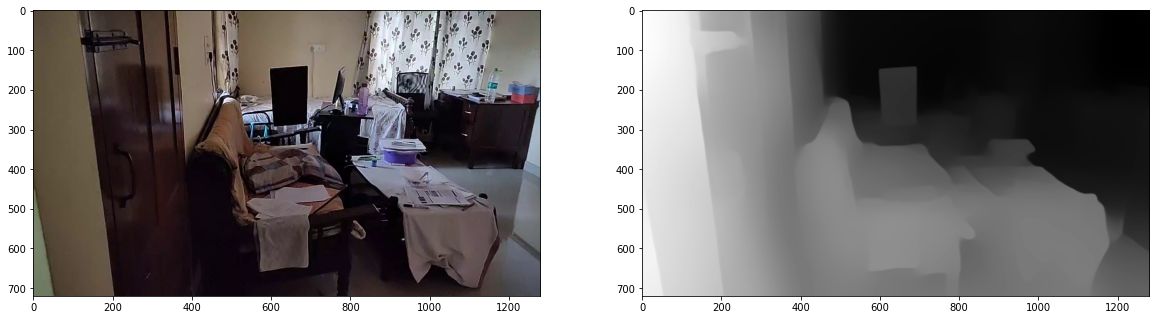

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dmap, cmap='gray')

In [7]:
dmap[:, 0].max()

254.92627

In [8]:
import numpy as np
test = np.random.random((720, 1200))
test.shape

(720, 1200)